In [25]:
import requests
import pandas as pd
import sys, json
import json
import string
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

url="https://archive.org/advancedsearch.php?q=pneumonia&output=json&rows=500000"

In [26]:
response = requests.get(url).json()

In [27]:
response

{'responseHeader': {'status': 0,
  'QTime': 442,
  'params': {'query': '( (title:pneumonia^100 OR salients:pneumonia^50 OR subject:pneumonia^25 OR description:pneumonia^15 OR collection:pneumonia^10 OR language:pneumonia^10 OR text:pneumonia^1) )',
   'qin': 'pneumonia',
   'fields': '_default_',
   'wt': 'json',
   'rows': '500000',
   'start': 0}},
 'response': {'numFound': 8431,
  'start': 0,
  'docs': [{'backup_location': 'ia906509_16',
    'collection': ['Radio-KDVS-90-3-FM',
     'stream_only',
     'radio',
     'radioprograms'],
    'contributor': 'KDVS 90.3 FM [Surprise Valley]',
    'coverage': ['US', 'US-CA'],
    'date': '2017-10-16T00:00:00Z',
    'downloads': 5,
    'format': ['ASR',
     'Columbia Peaks',
     'Item Tile',
     'JSON SRT',
     'Metadata',
     'Ogg Vorbis',
     'PNG',
     'Spectrogram',
     'Speech Confidence JSON',
     'Speech VS Music JSON',
     'SubRip',
     'VBR MP3',
     'Web Video Text Tracks'],
    'identifier': 'KDVS_90_3_FM_20171016_0000

In [29]:
response['response']['docs'][1]['publicdate']

'2014-10-24T16:07:50Z'

In [30]:
dates = [""]*9999
for count,row in enumerate(response['response']['docs']):
    try:
        dates[count]=row['publicdate']
    except:
        try:
            dates[count]=row['date']
        except:
            pass


In [31]:
dates

['2017-11-02T05:14:53Z',
 '2014-10-24T16:07:50Z',
 '2014-10-22T19:23:00Z',
 '2019-05-08T23:51:15Z',
 '2019-09-26T23:33:42Z',
 '2019-09-25T13:43:30Z',
 '2019-04-27T22:08:16Z',
 '2015-06-18T21:55:12Z',
 '2020-08-11T01:27:09Z',
 '2017-08-31T23:34:41Z',
 '2019-12-30T13:09:28Z',
 '2018-08-16T17:11:42Z',
 '2019-12-28T09:12:58Z',
 '2019-12-19T14:07:44Z',
 '2017-11-22T05:14:06Z',
 '2020-01-06T01:13:39Z',
 '2020-01-03T03:01:59Z',
 '2017-05-11T07:20:44Z',
 '2018-03-12T10:56:57Z',
 '2019-12-24T01:08:56Z',
 '2020-01-05T21:09:32Z',
 '2017-08-16T19:10:54Z',
 '2017-11-13T17:00:57Z',
 '2018-11-05T16:21:46Z',
 '2017-10-07T17:13:25Z',
 '2020-01-06T08:04:39Z',
 '2014-10-23T20:33:02Z',
 '2013-02-26T21:26:43Z',
 '2017-11-01T08:14:22Z',
 '2017-10-08T05:09:28Z',
 '2019-07-20T04:36:49Z',
 '2018-02-25T22:55:24Z',
 '2019-05-03T07:08:06Z',
 '2019-11-07T14:01:47Z',
 '2018-06-13T02:26:41Z',
 '2015-06-18T22:28:05Z',
 '2015-06-18T22:28:00Z',
 '2019-12-13T05:15:36Z',
 '2020-02-26T04:05:00Z',
 '2014-10-25T07:51:41Z',


In [32]:
dates = [x for x in dates if x]

In [33]:
dates = [x for x in dates if str(dates[0]) != "0"]

In [34]:
dates

['2017-11-02T05:14:53Z',
 '2014-10-24T16:07:50Z',
 '2014-10-22T19:23:00Z',
 '2019-05-08T23:51:15Z',
 '2019-09-26T23:33:42Z',
 '2019-09-25T13:43:30Z',
 '2019-04-27T22:08:16Z',
 '2015-06-18T21:55:12Z',
 '2020-08-11T01:27:09Z',
 '2017-08-31T23:34:41Z',
 '2019-12-30T13:09:28Z',
 '2018-08-16T17:11:42Z',
 '2019-12-28T09:12:58Z',
 '2019-12-19T14:07:44Z',
 '2017-11-22T05:14:06Z',
 '2020-01-06T01:13:39Z',
 '2020-01-03T03:01:59Z',
 '2017-05-11T07:20:44Z',
 '2018-03-12T10:56:57Z',
 '2019-12-24T01:08:56Z',
 '2020-01-05T21:09:32Z',
 '2017-08-16T19:10:54Z',
 '2017-11-13T17:00:57Z',
 '2018-11-05T16:21:46Z',
 '2017-10-07T17:13:25Z',
 '2020-01-06T08:04:39Z',
 '2014-10-23T20:33:02Z',
 '2013-02-26T21:26:43Z',
 '2017-11-01T08:14:22Z',
 '2017-10-08T05:09:28Z',
 '2019-07-20T04:36:49Z',
 '2018-02-25T22:55:24Z',
 '2019-05-03T07:08:06Z',
 '2019-11-07T14:01:47Z',
 '2018-06-13T02:26:41Z',
 '2015-06-18T22:28:05Z',
 '2015-06-18T22:28:00Z',
 '2019-12-13T05:15:36Z',
 '2020-02-26T04:05:00Z',
 '2014-10-25T07:51:41Z',


In [35]:
lastdates=len(dates)
newdates=0
while (newdates != lastdates):
    lastdates=newdates
    for i,row in enumerate(dates):    
        if dates[i][:4] < '2018':
            del dates[i]
            newdates=len(dates)

In [36]:
len(dates)

4758

In [37]:
min(dates)

'2018-01-01T00:45:25Z'

In [38]:
max(dates)

'2021-10-02T04:49:38Z'

In [39]:
df = pd.DataFrame(dates)
#df = df.value_counts().sort_index()

In [40]:
df[0] = pd.to_datetime(df[0], dayfirst=True)

df1 = df[0].dt.date.value_counts().sort_index().reset_index()

df1.columns = ['DATE','Count']

In [41]:
df1['DATE'] = pd.to_datetime(df1['DATE'])

In [42]:
df1.set_index('DATE', inplace=True)

In [43]:
df1

Count
DATE             
2018-01-01     11
2018-01-02      9
2018-01-03      5
2018-01-04      5
2018-01-05      8
...           ...
2021-09-27      1
2021-09-29      1
2021-09-30      1
2021-10-01      5
2021-10-02      1

[1059 rows x 1 columns]

In [44]:
print (df1.index)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-09-16', '2021-09-18', '2021-09-21', '2021-09-22',
               '2021-09-25', '2021-09-27', '2021-09-29', '2021-09-30',
               '2021-10-01', '2021-10-02'],
              dtype='datetime64[ns]', name='DATE', length=1059, freq=None)


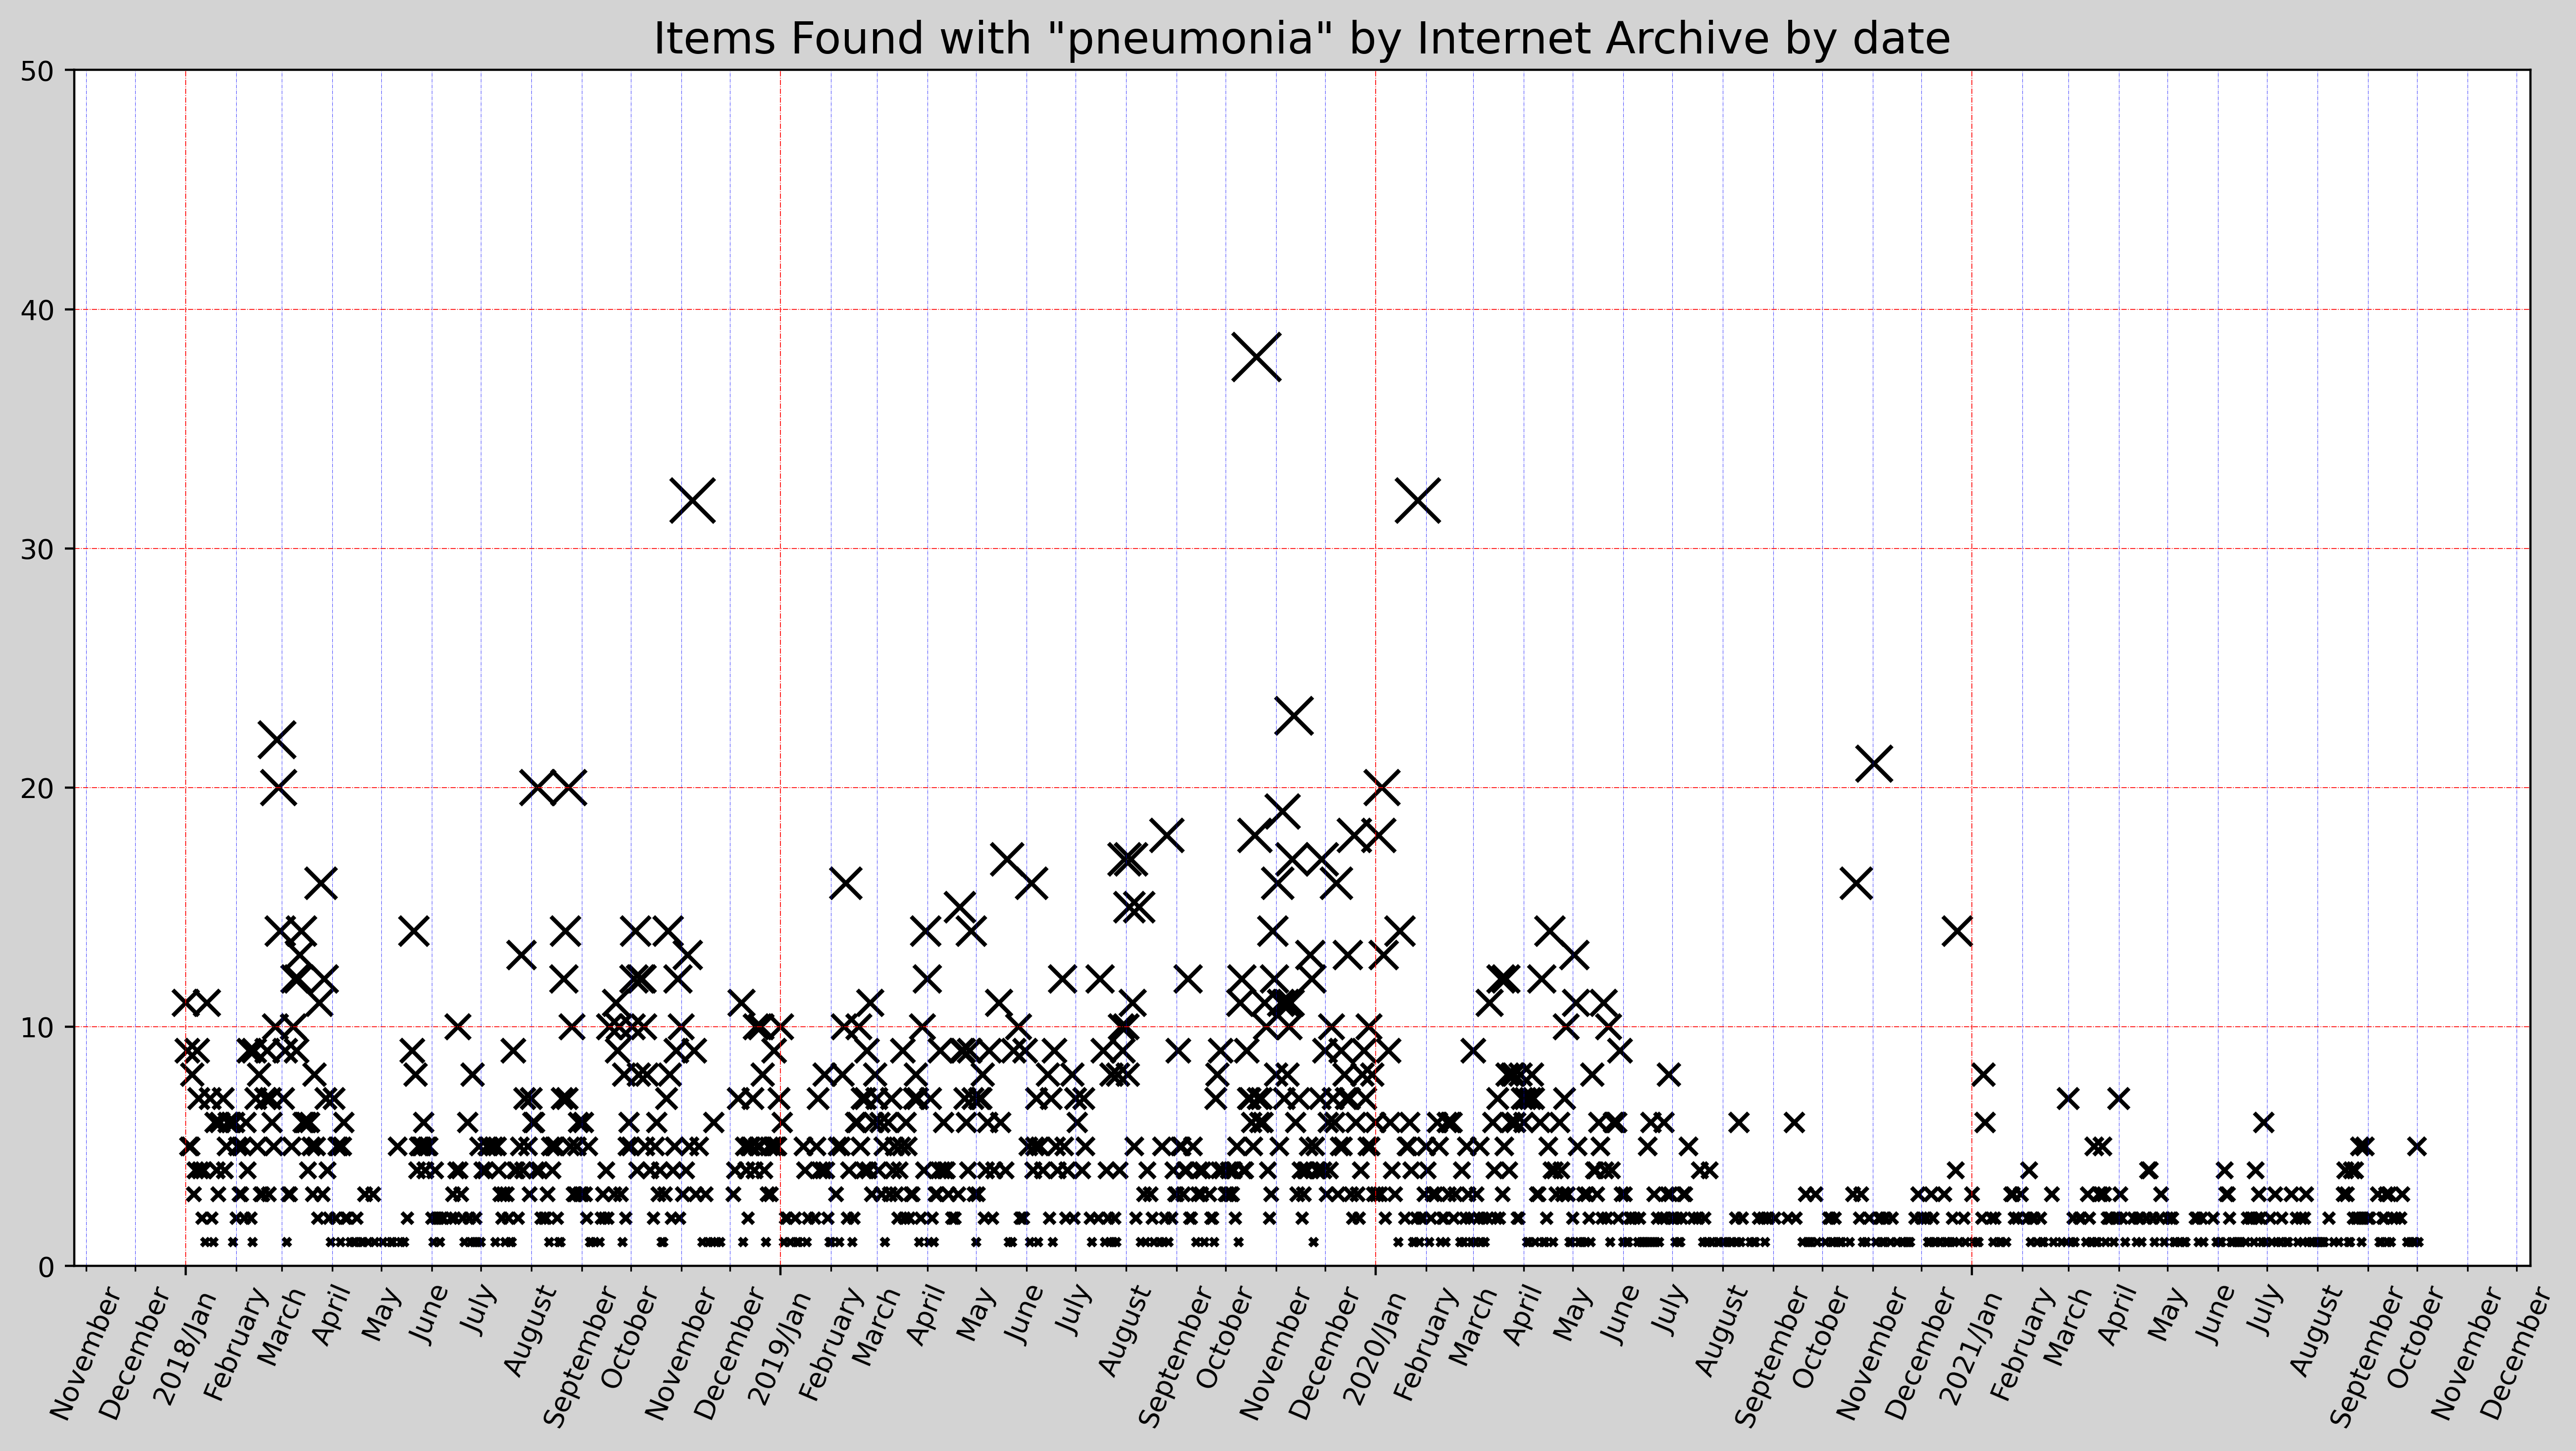

In [45]:
x = df1.index

y = df1['Count']

fig= plt.figure(figsize=(16, 8), dpi=400,facecolor='lightgray')

plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%B'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().tick_params(axis="x", which="both", rotation=67)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%b'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.scatter(x,y,s=y*8,marker='x',color='k')
plt.gca().grid(which='major', color='r', linestyle='-.', linewidth=.3, alpha=1)  
plt.gca().grid(which='minor', color='b', linestyle='-.', linewidth=.2,alpha=.7)
plt.ylim(top=50,bottom=0)
plt.title('Items Found with "pneumonia" by Internet Archive by date',size=16)

plt.show()
plt.close()

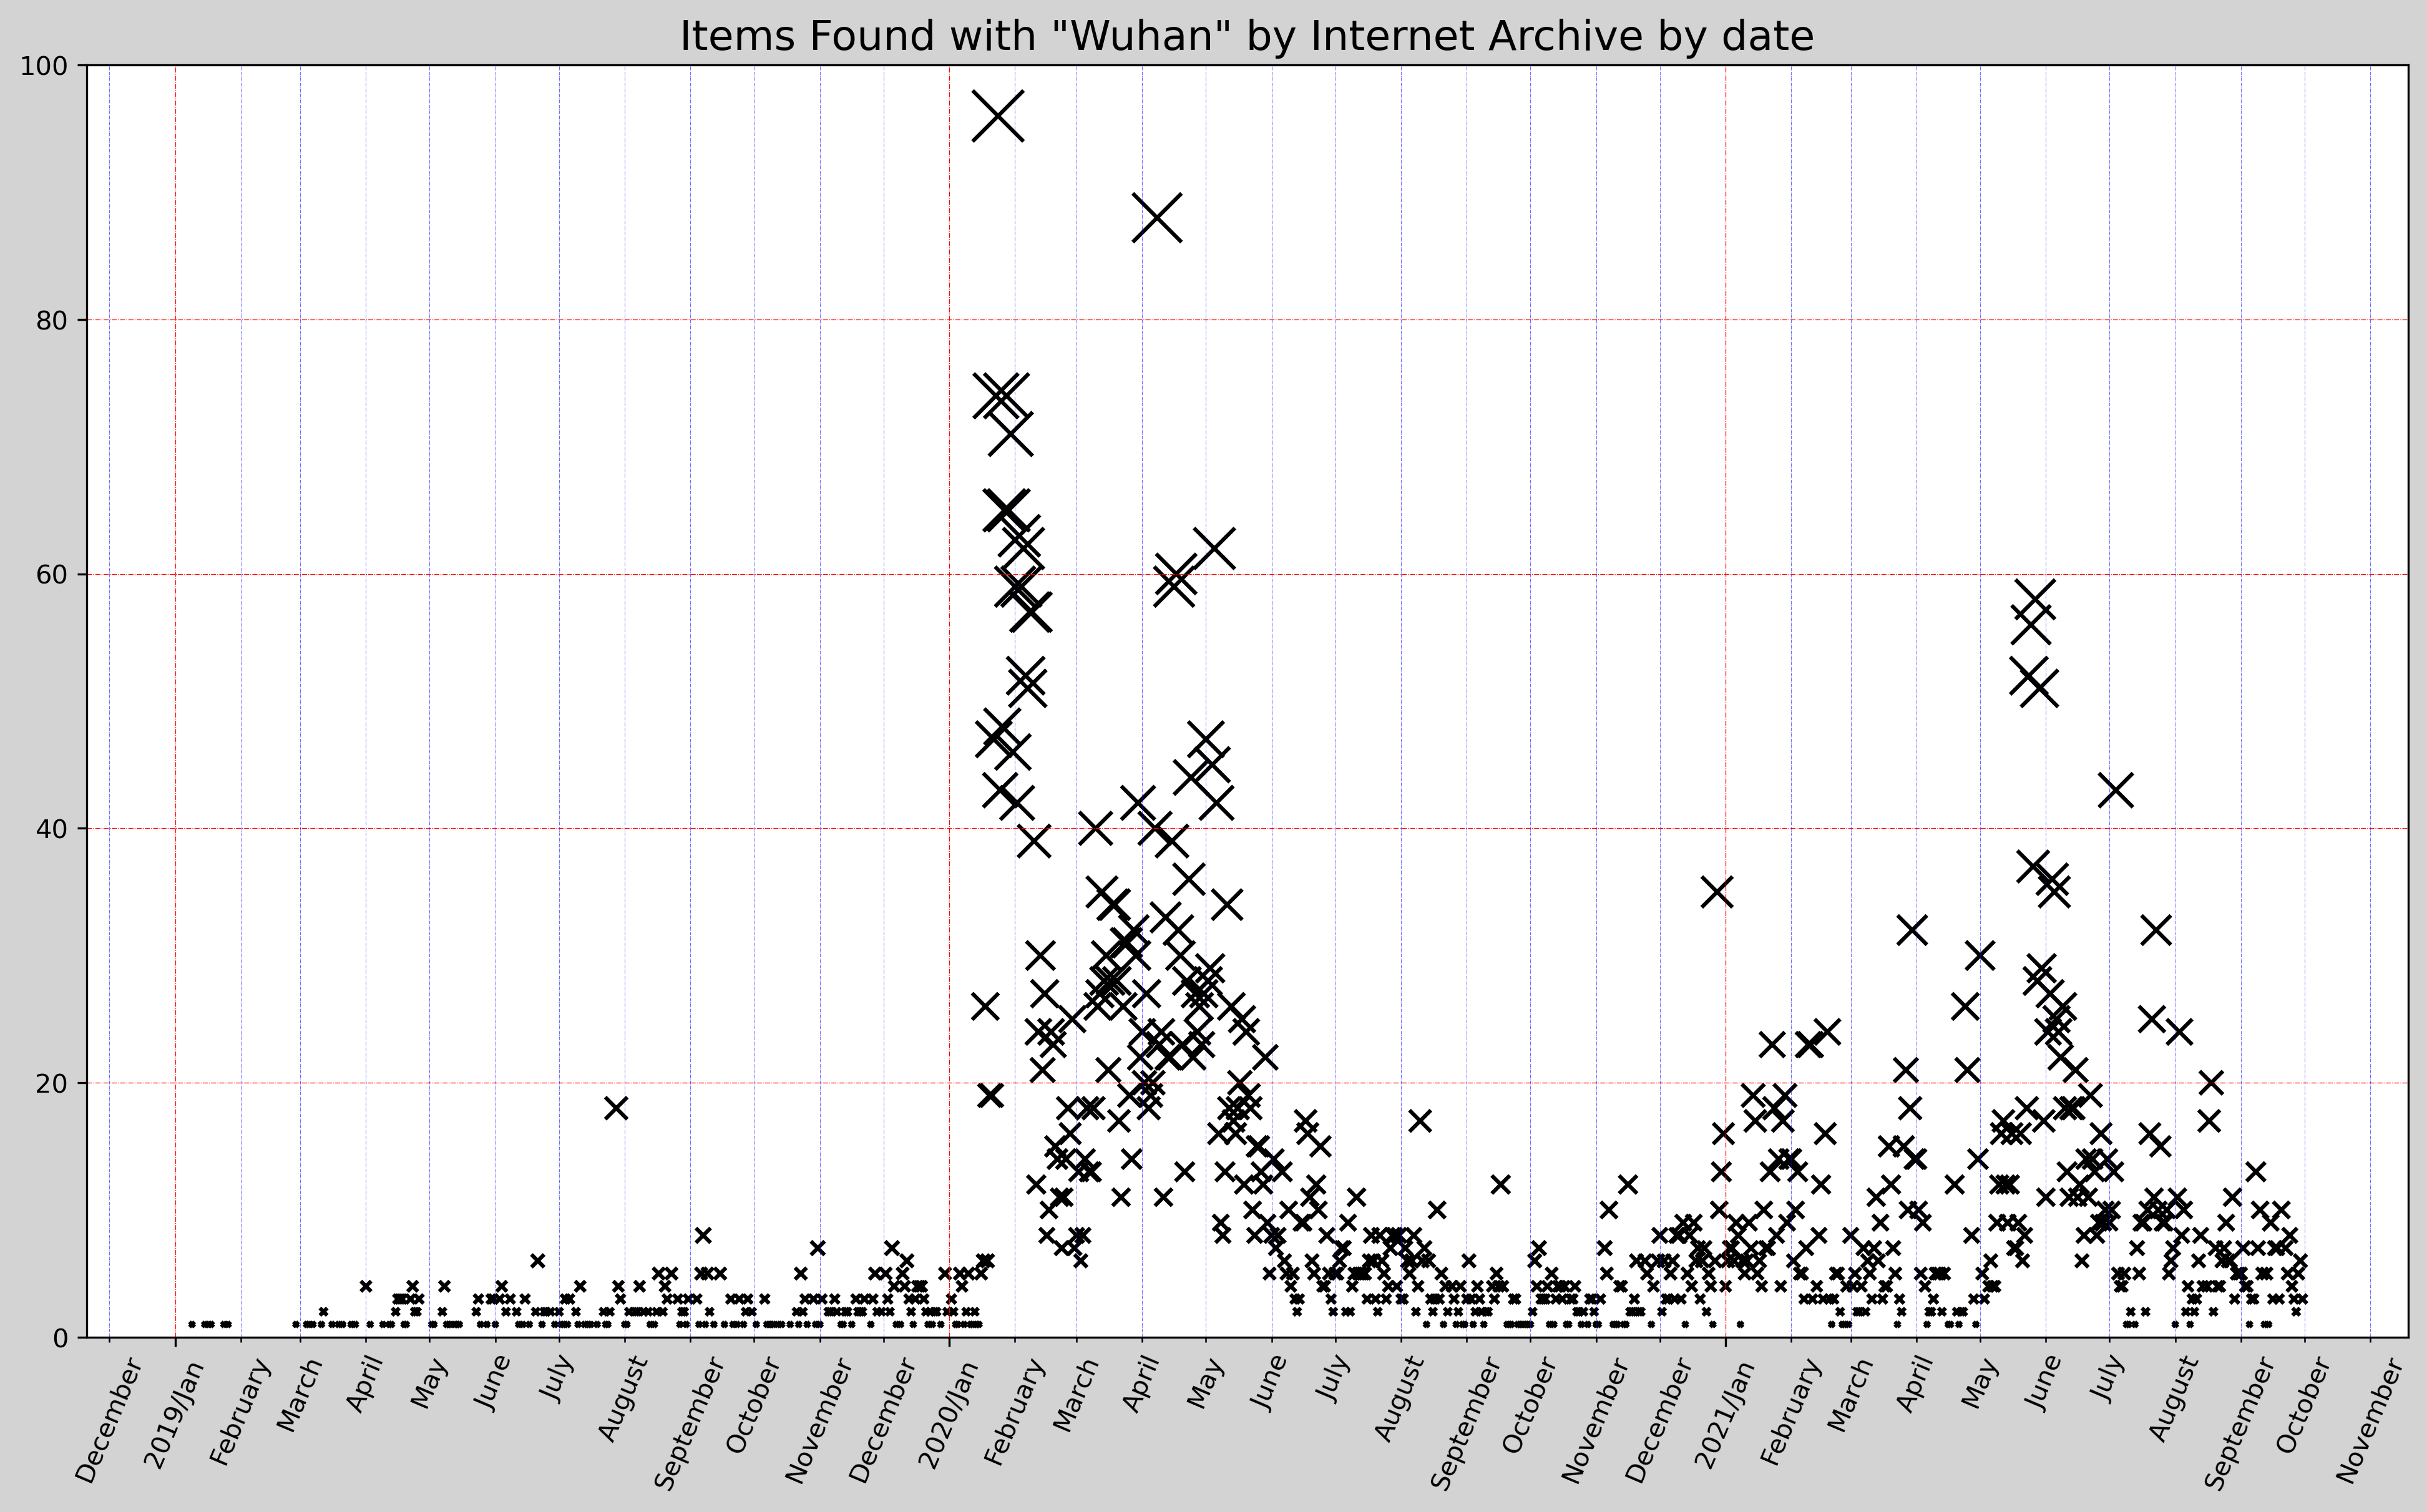

In [1108]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from celluloid import Camera

fig = plt.figure(figsize=(16, 9), dpi=300,facecolor='lightgray')
ax=  fig.gca()
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%B'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.tick_params(axis="x", which="both", rotation=67)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%b'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.grid(which='major', color='r', linestyle='-.', linewidth=.3, alpha=1)  
ax.grid(which='minor', color='b', linestyle='-.', linewidth=.2,alpha=.7)
ax.set_ylim(top=100,bottom=0)

plt.title('Items Found with "Wuhan" by Internet Archive by date',size=16)

rows = []
a = 0
camera = Camera(fig)
for i,row in df1.iterrows():
    rows=df1[:i]
    ax.scatter(rows['Count'].index,rows['Count'],s=rows['Count']*4,marker='x',color='k')
    camera.snap()

anim = camera.animate(blit=False)

anim.save('scatter.gif',fps=60)

plt.show()
plt.close()